In [1]:
from solcore import si, material
from solcore.structure import Layer, Structure, Junction
from solcore.solar_cell import SolarCell
import solcore.quantum_mechanics as QM
import solcore.poisson_drift_diffusion as PDD
import numpy as np
from solcore.light_source import LightSource
from solcore.solar_cell_solver import solar_cell_solver
import matplotlib.pyplot as plt
import solcore.quantum_mechanics.graphics as grap
import os
import shutil
wl = np.linspace(350, 1200, 401) * 1e-9
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1,
)

c:\Users\usuwa\PycharmProjects\Solarcell\venv\lib\site-packages\solcore\registries.py:73: UserWarning: Optics solver 'RCWA' will not be available. An installation of S4 has not been found.
  warn(


In [8]:
def solar_cells(barrier, interlayer, dot, update,note ,version,active_dot=True):
    vint = np.linspace(-3.5, 4, 600)
    V = np.linspace(-3.5, 0, 300)
    T = 298
    wl = np.linspace(350, 1050, 301) * 1e-9

    # First, we create the materials of the QW
    # สร้างวัสดุทำรับQW ในsolar cell
    QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
    Bmat = material("GaAsP")(T=T, P=0.1, strained=False)
    i_GaAs = material("GaAs")(T=T)
    i_GaAs_dope = material("GaAs")(T=T, Na=1e14)

    n_GaAs = material("GaAs")(T=T, Nd=1e24)
    p_GaAs = material("GaAs")(T=T, Na=8e22)
    if active_dot:
        QW = PDD.QWunit([
            Layer(width=barrier, material=Bmat, role="barrier"),
            Layer(width=interlayer, material=i_GaAs, role="interlayer"),
            Layer(width=dot, material=QWmat, role="well"),
            Layer(width=interlayer, material=i_GaAs, role="interlayer"),
            Layer(width=barrier, material=Bmat, role="barrier")
        ], T=T, repeat=30, substrate=i_GaAs, )
        QW_list = QW.GetEffectiveQW(wavelengths=wl, mode="kp6x6")
        GaAs_junction = Junction(
            [Layer(width=150e-9, material=n_GaAs, role="Emitter"),]
             # Layer(width=barrier, material=Bmat, role="barrier")]
            + QW_list
            # + [Layer(width=barrier, material=Bmat, role="barrier"),
            +[Layer(width=2000e-9, material=p_GaAs, role="Base"),
            ],
            sn=1e6,
            sp=1e6,T=T,kind="PDD",)
    else:
        GaAs_junction = Junction(
            [Layer(width=150e-9, material=n_GaAs, role="Emitter"), ]
            # Layer(width=barrier, material=Bmat, role="barrier")]
            # + QW_list
                # + [Layer(width=barrier, material=Bmat, role="barrier"),
            +[Layer(width=2000e-9, material=p_GaAs, role="Base"),
            ],
            sn=1e6,
            sp=1e6, T=T, kind="PDD", )
    MgF2 = material("MgF2")()
    ZnS = material("ZnScub")()
    my_solar_cell = SolarCell([
        # [Layer(width=110e-9, material=MgF2, role="ARC1"),
        # Layer(width=60e-9, material=ZnS, role="ARC2")
                            GaAs_junction,]
                              ,T=T,substrate=p_GaAs,)
    solar_cell_solver(my_solar_cell, "qe",
                      user_options={"light_source": light_source,
                                    "wavelength": wl,
                                    "optics_method": "TMM",}, )
    solar_cell_solver(my_solar_cell, 'IV',
                      user_option={'light_source': light_source,
                                   'wavelength': wl,
                                   'optics_method': None,
                                   'light_iv' : True,
                                   "mpp" : True,
                                   "voltages" : V,
                                   "internal_voltages" : vint
                                   })
    fig2, axIV = plt.subplots(1, 1, figsize=(6, 4))
    axIV.plot(-V, i/ -10, label=version)
    axIV.set_ylim(0, 30)
    axIV.set_xlim(0, 1.5)
    axIV.set_xlabel("Voltage (V)")
    axIV.set_ylabel("J$_{SC}$ (mA/cm$^{2}$)")
    plt.tight_layout()
    fig, ax1  = plt.subplots(1, 1, figsize=(6, 4))
    # We can plot the electron and hole densities in equilibrium and at short circuit
    ax1.plot(wl * 1e9, my_solar_cell.absorbed, "k", label="Total Absorbed")
    ax1.legend(loc="upper right", frameon=False)
    ax1.set_xlabel("Wavelength (nm)")
    ax1.set_ylabel("EQE")
    ax1.set_ylim(0, 1.1)
    ax1.set_xlim(350, 1150)
    plt.tight_layout()
    # AM15 = LightSource(source_type="standard", x=wl, version="AM1.5g", concentration=1,)
    # ax1.plot(wl*1e9, AM15.spectrum()[0]/max(AM15.spectrum()[0]),'--', label='AM 1.5G normalrize')
    # ax1.plot(wl*1e9, AM15.spectrum()[0]/max(AM15.spectrum()[0]),'--', label='AM 1.5G normalrize')
    # fig.savefig(f'{note}.png', dpi=300)
    plt.show()
    return my_solar_cell




In [9]:
my_solar_cell = solar_cells(5e-9, 2e-9,7e-9, (1,1),'powerpoint_show', 'EQE_QW_withlightpowerpoint_show',active_dot=True,)
AM15 = LightSource(source_type="standard", x=wl, version="AM1.5g", concentration=1,)
# print(type(AM15.spectrum()))
for i in AM15.spectrum()[0]:
    print(i)
print('===========================')
print(AM15.spectrum()[0]/max(AM15.spectrum()[0]))


Solving QW properties...
Calculation finished!!
Organising the bands into E, HH and LH
Calculating RAT...
Calculating absorption profile...
Solving QE of the solar cell...
Solving quantum efficiency...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!



TypeError: solar_cell_solver() got an unexpected keyword argument 'user_option'

In [ ]:
my_solar_cell.__dict__()

In [3]:
def showeiei(barrier, interlayer, dot):
    T = 293
    n_GaAs = material("GaAs")(T=T, Nd=1e24)
    p_GaAs = material("GaAs")(T=T, Na=8e22)
    QWmat = material("InGaAs")(T=T, In=0.2, strained=True)
    Bmat = material("GaAsP")(T=T, P=0.1, strained=False)
    i_GaAs = material("GaAs")(T=T)
    # i_GaAs_dope = material("GaAs")(T=T, Na= 1e14)

    struc = Structure(
                [Layer(width=50e-9, material=n_GaAs, role="Emitter")]+
                      # [Layer(width=barrier, material=Bmat, role="barrier")] +
                        10* [Layer(width=barrier, material=Bmat, role="barrier"),
                              Layer(width=interlayer, material=i_GaAs, role="interlayer"),
                              Layer(width=dot, material=QWmat, role="well"),
                              Layer(width=interlayer, material=i_GaAs, role="interlayer"),
                              Layer(width=barrier, material=Bmat, role="barrier")]
                      # +10 * [Layer(width=10e-9, material=Bmat, role="barrier"),
                             # Layer(width=2e-9, material=i_GaAs, role="well"),
                             # Layer(width=7e-9, material=QWmat, role="well"),
                             # Layer(width=2e-9, material=i_GaAs, role="well"),
                             # Layer(width=10e-9, material=Bmat, role="barrier"),] +
                  #     [Layer(width=barrier, material=Bmat, role="barrier")] +
                      +[Layer(width=100e-9, material=p_GaAs, role="Base")]
                      ,substrate=i_GaAs)
    # print(struc)
    SR, band = QM.schrodinger(struc, quasiconfined=0, graphtype='potentialsLDOS', num_eigenvalues=200,plot_bands=True)

    return SR, band,struc

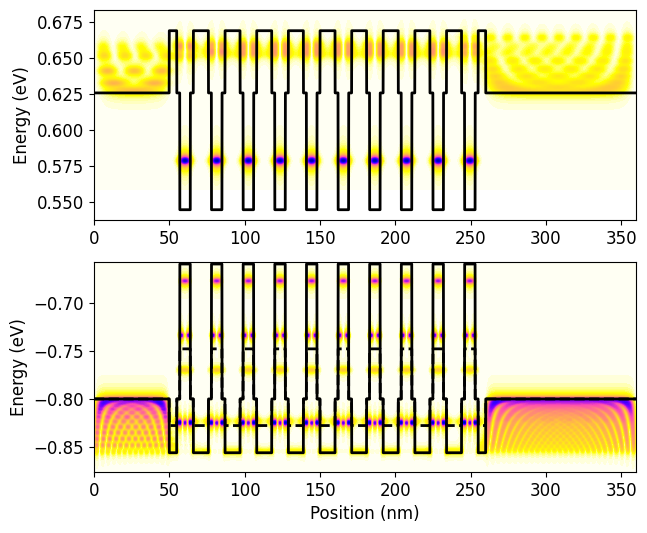

In [4]:
out, band, struc= showeiei(5e-9, 2e-9, 7e-9)


In [5]:
for i in band:
    print(i,len( band[i]))
    print(band[i])
print('=================================')
for i in out['LDOS']:
    print(i, len(out['LDOS'][i]))
    print(out['LDOS'][i])
    print('==================================')
# print(len(band['x']),band['x'])
# print(len(band['Ve']),band['Ve'])
# print(len(band['Vhh']),band['Vhh'])

# print(out['Ee'])
# for i in out:
#     print(i,len(out[i]))
#     print(out[i])
    # for k in out[i].key():
        # print(k, out[i][k])
        # print('==================================')
    

x 3599
[0.00000000e+00 1.00055586e-10 2.00111173e-10 ... 3.59799889e-07
 3.59899944e-07 3.60000000e-07]
Ee 33
[9.26814867e-20 9.26842552e-20 9.26884379e-20 9.26938792e-20
 9.27004257e-20 9.27070423e-20 9.27138397e-20 9.27196678e-20
 9.27243025e-20 9.27274111e-20 1.00312608e-19 1.00516049e-19
 1.00535997e-19 1.00907770e-19 1.01345300e-19 1.01426894e-19
 1.02091188e-19 1.02702232e-19 1.02895080e-19 1.03816087e-19
 1.04345948e-19 1.04464731e-19 1.04533795e-19 1.04626060e-19
 1.04740046e-19 1.04878351e-19 1.05045018e-19 1.05217250e-19
 1.05379955e-19 1.05517366e-19 1.05632854e-19 1.05719082e-19
 1.06397663e-19]
psi_e 33
[array([8.36788194e-07, 1.67435576e-06, 2.51348380e-06, ...,
       6.50340578e-13, 6.50340578e-13, 4.76916424e-13]), array([-1.77186673e-06, -3.54538387e-06, -5.32220407e-06, ...,
        5.20272462e-13,  2.60136231e-13, -8.67120771e-14]), array([-2.30860933e-06, -4.61936850e-06, -6.93442869e-06, ...,
       -1.30610066e-12, -6.06984539e-13, -3.03492270e-13]), array([-2.83

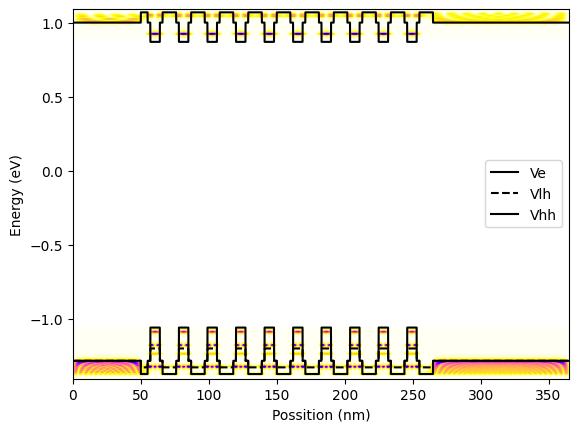

In [124]:
import matplotlib.pyplot as plt
def plotice(out, band):
    plt.contourf(out['LDOS']['x'] * 1e9, out['LDOS']['Ee'] / 1e-19, out['LDOS']['LDOSe'], 100, cmap='gnuplot2_r', vmin=0, vmax=max(out['LDOS']['LDOSe'].flatten()) * 1.2)
    plt.plot(band['x']*1e9, band['Ve']/1e-19, 'k', label="Ve")
    plt.plot(band['x']*1e9, band['Vlh']/1e-19, 'k--',  label="Vlh")
    plt.plot(band['x']*1e9, band['Vhh']/1e-19, 'k',  label="Vhh")

    plt.contourf(out['LDOS']['x'] * 1e9, out['LDOS']['Eh'] / 1e-19, out['LDOS']['LDOSh'], 100, cmap='gnuplot2_r', vmin=0, vmax=max(out['LDOS']['LDOSh'].flatten()) * 1.2)
    plt.ylabel('Energy (eV)')
    plt.xlabel('Possition (nm)')
    plt.legend()
    plt.show()


In [8]:
g = grap.schrodinger_graph(out,show=True)

AttributeError: module 'collections' has no attribute 'Iterable'

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747 40.         40.10416667 40.20833333
 40.3125     40.41666667 40.52083333 40.625      40

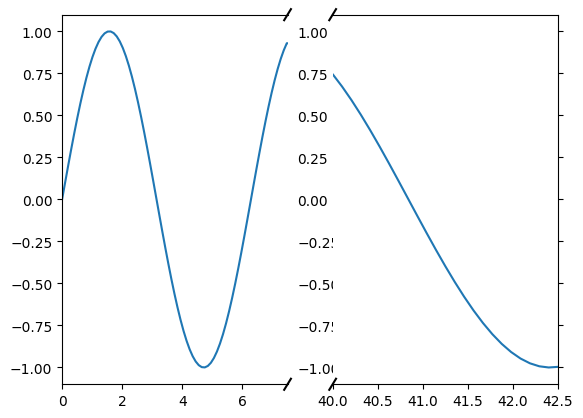

In [157]:

x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

print(x)
y = np.sin(x)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x, y)
ax2.plot(x, y)

ax.set_xlim(0, 7.5)
ax2.set_xlim(40, 42.5)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()